In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [3]:
df.shape

(155223, 19)

In [4]:
df.Target.value_counts()

0    89843
1    65380
Name: Target, dtype: int64

In [5]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [6]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [7]:
df.shape

(75345, 19)

In [8]:
df.Target.value_counts()

0    40734
1    34611
Name: Target, dtype: int64

In [9]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

## Feature Scaling 

In [10]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

In [11]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
scaler.fit(df[feature_scale])

RobustScaler()

In [12]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [13]:
data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,65.237482,-0.326316
1,0,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,65.237482,-0.326316
2,0,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,65.237482,-0.326316
3,1,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,65.237482,-0.326316
4,0,-34.603684,-58.381559,22,18,0.0,8.6,26,15,17,61,78,1015,8,105,2016,4,65.237482,3.157895


In [14]:
X = data.iloc[:,1:]  #independent columns
y = data['Target'] #dependent column

## 1. ExtraTreesClassifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [16]:
model.feature_importances_

array([0.15077944, 0.16317669, 0.04988249, 0.0586942 , 0.00081801,
       0.03458615, 0.03175767, 0.05746592, 0.03618055, 0.03409209,
       0.04011563, 0.03324167, 0.02156208, 0.04135068, 0.04228491,
       0.05374037, 0.12099785, 0.02927359])

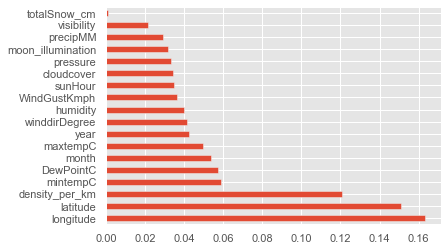

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [18]:
print(feat_importances.nlargest(24))

longitude            0.163177
latitude             0.150779
density_per_km       0.120998
mintempC             0.058694
DewPointC            0.057466
month                0.053740
maxtempC             0.049882
year                 0.042285
winddirDegree        0.041351
humidity             0.040116
WindGustKmph         0.036181
sunHour              0.034586
cloudcover           0.034092
pressure             0.033242
moon_illumination    0.031758
precipMM             0.029274
visibility           0.021562
totalSnow_cm         0.000818
dtype: float64


## 2. Infromation gain

In [19]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

In [20]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

latitude             0.103993
longitude            0.103463
density_per_km       0.098409
DewPointC            0.012526
mintempC             0.010259
year                 0.008934
maxtempC             0.008728
sunHour              0.006004
moon_illumination    0.005510
month                0.003855
cloudcover           0.003612
winddirDegree        0.002569
pressure             0.002225
visibility           0.000886
WindGustKmph         0.000537
humidity             0.000000
totalSnow_cm         0.000000
precipMM             0.000000
dtype: float64

<AxesSubplot:>

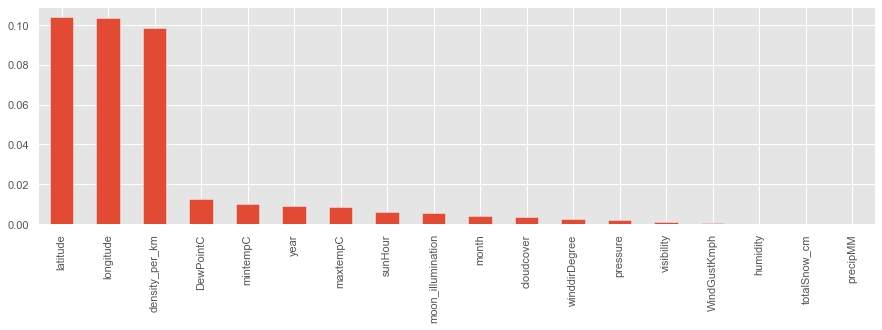

In [21]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [22]:
from sklearn.feature_selection import SelectKBest
select_col = SelectKBest(mutual_info_classif,k=18)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['latitude', 'longitude', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'moon_illumination', 'DewPointC', 'WindGustKmph',
       'cloudcover', 'humidity', 'pressure', 'visibility', 'winddirDegree',
       'year', 'month', 'density_per_km', 'precipMM'],
      dtype='object')

## 3. XGBoost

[18:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.1373619  0.11920454 0.03927198 0.05909675 0.05953119 0.01458584
 0.02668072 0.2134905  0.02027693 0.01465383 0.02709049 0.02036607
 0.01222038 0.01829755 0.07180817 0.05395297 0.07692171 0.01518853]


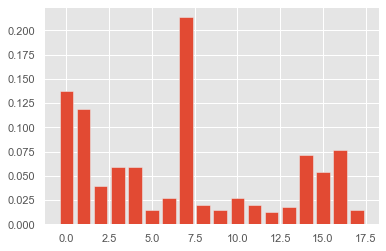

In [23]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [24]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

DewPointC            0.213491
latitude             0.137362
longitude            0.119205
density_per_km       0.076922
year                 0.071808
totalSnow_cm         0.059531
mintempC             0.059097
month                0.053953
maxtempC             0.039272
humidity             0.027090
moon_illumination    0.026681
pressure             0.020366
WindGustKmph         0.020277
winddirDegree        0.018298
precipMM             0.015189
cloudcover           0.014654
sunHour              0.014586
visibility           0.012220
dtype: float32

<AxesSubplot:>

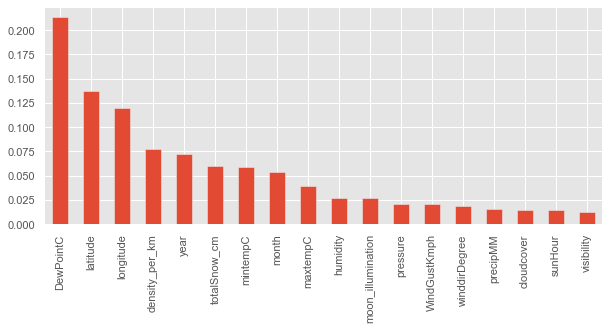

In [25]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [26]:
len(df.columns)

19